Epoch 1/50


c:\Users\Kyosune\Study\Analysis and System Development\4th Semester\Analisys and Business Intelligence\2nd_Bimester\homework\ai\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6831 - loss: 0.5966 - val_accuracy: 0.8507 - val_loss: 0.4313
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8510 - loss: 0.4251 - val_accuracy: 0.8507 - val_loss: 0.4264
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8486 - loss: 0.4211 - val_accuracy: 0.8507 - val_loss: 0.4274
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8541 - loss: 0.4115 - val_accuracy: 0.8507 - val_loss: 0.4266
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8548 - loss: 0.4075 - val_accuracy: 0.8507 - val_loss: 0.4283
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8519 - loss: 0.4108 - val_accuracy: 0.8507 - val_loss: 0.4276
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8510 - loss: 0.4115 - val_accuracy: 0.8507 - val_loss: 0.4284
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8396 - loss: 0.4327 - val_accuracy: 0.8507 - val_loss: 0.4290
Epo

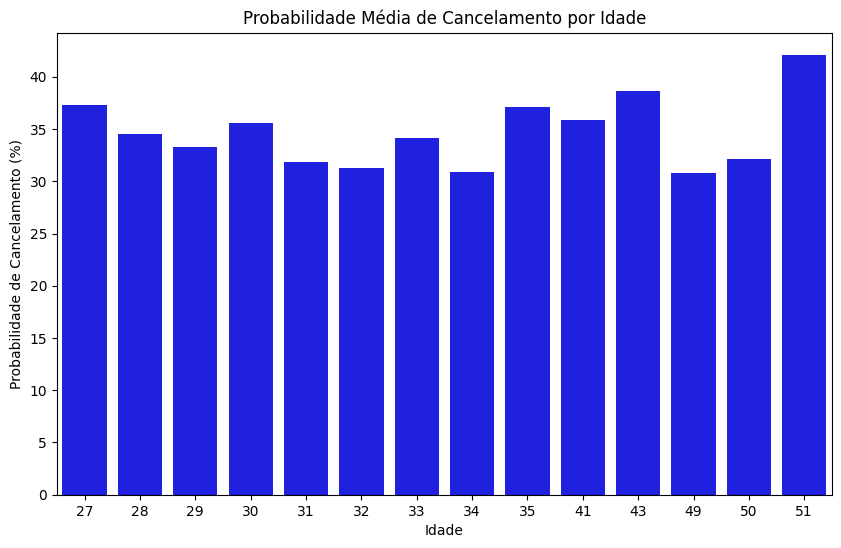

C:\Users\Kyosune\AppData\Local\Temp\ipykernel_7364\3581272352.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_risk_users, x="Device", y="Cancel_Probability", palette="viridis", errorbar=None, legend=False)


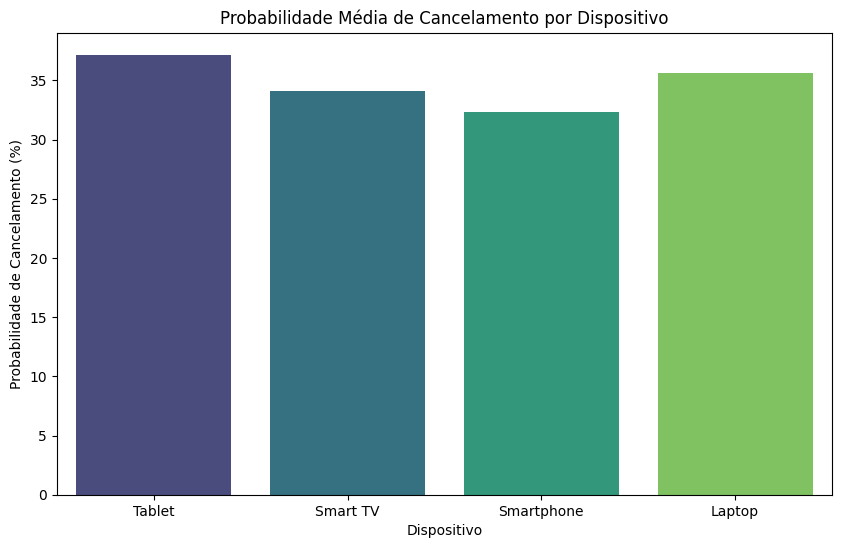

C:\Users\Kyosune\AppData\Local\Temp\ipykernel_7364\3581272352.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_risk_users, x="Country", y="Cancel_Probability", palette="viridis", errorbar=None, legend=False)


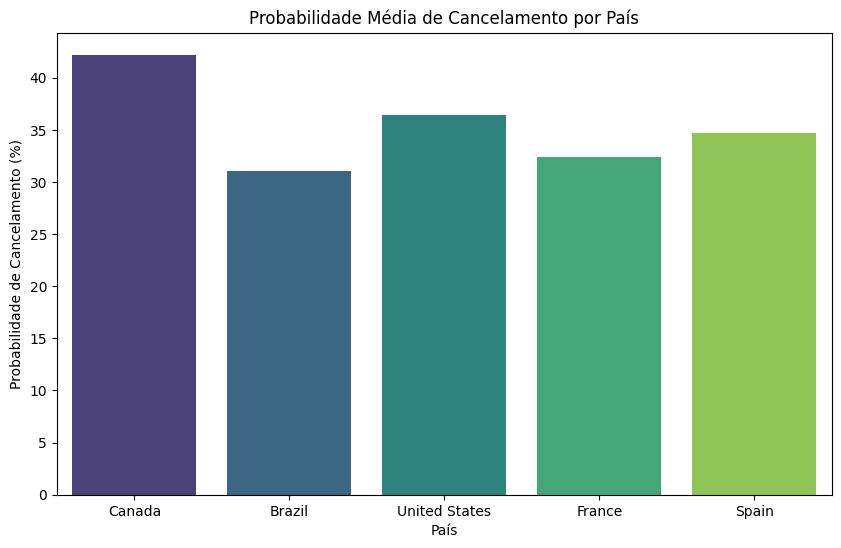

C:\Users\Kyosune\AppData\Local\Temp\ipykernel_7364\3581272352.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_risk_users, x="Subscription", y="Cancel_Probability", palette="viridis", errorbar=None, legend=False)


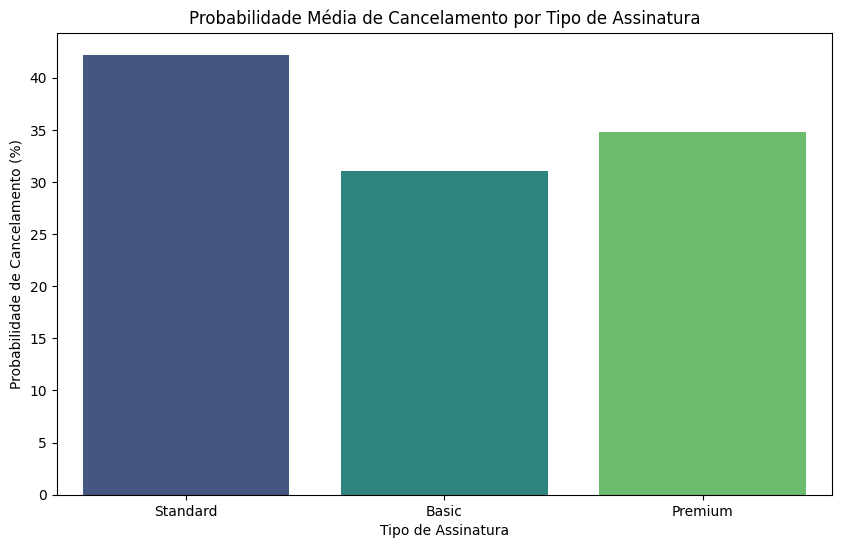

C:\Users\Kyosune\AppData\Local\Temp\ipykernel_7364\3581272352.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_risk_users, x="Gender", y="Cancel_Probability", palette="viridis", errorbar=None, legend=False)


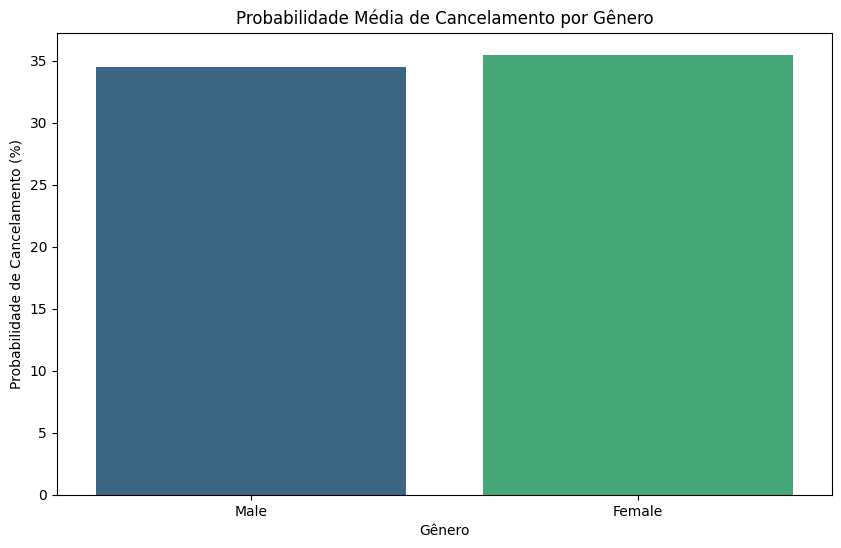

In [9]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Carregar os dados
df = pd.read_excel("./db/netflix_userbase.xlsx")

# Codificação das variáveis categóricas
label_encoder_subscription = LabelEncoder()
label_encoder_device = LabelEncoder()
label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_status = LabelEncoder()

df["Subscription_encoded"] = label_encoder_subscription.fit_transform(df["Subscription Type"])
df["Device_encoded"] = label_encoder_device.fit_transform(df["Device"])
df["Country_encoded"] = label_encoder_country.fit_transform(df["Country"])
df["Gender_encoded"] = label_encoder_gender.fit_transform(df["Gender"])
df["Status_encoded"] = label_encoder_status.fit_transform(df["Status"])  # Status como variável alvo

# Selecionar as variáveis de entrada (features) e a variável alvo (target)
X = df[["Age", "Device_encoded", "Country_encoded", "Gender_encoded", "Subscription_encoded"]]
y = df["Status_encoded"]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar os dados para normalizar as entradas, mas manter os valores originais da idade
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construção e treinamento do modelo de rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Saída sigmoide para prever probabilidade de cancelamento
])

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test), verbose=1)

# Fazer previsões no conjunto de teste e calcular a probabilidade de cancelamento
y_pred_prob = model.predict(X_test_scaled)

# Adicionar probabilidade de cancelamento ao conjunto de teste (em porcentagem)
X_test_df = X_test.copy()  # Usar os dados originais não normalizados para visualização
X_test_df['Cancel_Probability'] = (y_pred_prob * 100).flatten()  # Converter para porcentagem
X_test_df['Actual_Status'] = y_test.values
X_test_df['Predicted_Status'] = (y_pred_prob > 0.5).astype(int)

# Remapear as variáveis codificadas para os valores originais para visualização
X_test_df['Device'] = label_encoder_device.inverse_transform(X_test_df['Device_encoded'].astype(int))
X_test_df['Country'] = label_encoder_country.inverse_transform(X_test_df['Country_encoded'].astype(int))
X_test_df['Subscription'] = label_encoder_subscription.inverse_transform(X_test_df['Subscription_encoded'].astype(int))
X_test_df['Gender'] = label_encoder_gender.inverse_transform(X_test_df['Gender_encoded'].astype(int))

# Filtrar usuários com alta probabilidade de cancelamento
high_risk_users = X_test_df[X_test_df["Cancel_Probability"] > 30]  # Ajustar o limiar conforme necessário

# Gráficos de Probabilidade de Cancelamento para Cada Coluna

# Gráfico 1: Probabilidade média de cancelamento por idade
plt.figure(figsize=(10, 6))
sns.barplot(data=high_risk_users, x="Age", y="Cancel_Probability", color="blue", errorbar=None)
plt.title("Probabilidade Média de Cancelamento por Idade")
plt.xlabel("Idade")
plt.ylabel("Probabilidade de Cancelamento (%)")
plt.show()

# Gráfico 2: Probabilidade média de cancelamento por dispositivo
plt.figure(figsize=(10, 6))
sns.barplot(data=high_risk_users, x="Device", y="Cancel_Probability", palette="viridis", errorbar=None, legend=False)
plt.title("Probabilidade Média de Cancelamento por Dispositivo")
plt.xlabel("Dispositivo")
plt.ylabel("Probabilidade de Cancelamento (%)")
plt.show()

# Gráfico 3: Probabilidade média de cancelamento por país
plt.figure(figsize=(10, 6))
sns.barplot(data=high_risk_users, x="Country", y="Cancel_Probability", palette="viridis", errorbar=None, legend=False)
plt.title("Probabilidade Média de Cancelamento por País")
plt.xlabel("País")
plt.ylabel("Probabilidade de Cancelamento (%)")
plt.show()

# Gráfico 4: Probabilidade média de cancelamento por tipo de assinatura
plt.figure(figsize=(10, 6))
sns.barplot(data=high_risk_users, x="Subscription", y="Cancel_Probability", palette="viridis", errorbar=None, legend=False)
plt.title("Probabilidade Média de Cancelamento por Tipo de Assinatura")
plt.xlabel("Tipo de Assinatura")
plt.ylabel("Probabilidade de Cancelamento (%)")
plt.show()

# Gráfico 5: Probabilidade média de cancelamento por gênero
plt.figure(figsize=(10, 6))
sns.barplot(data=high_risk_users, x="Gender", y="Cancel_Probability", palette="viridis", errorbar=None, legend=False)
plt.title("Probabilidade Média de Cancelamento por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Probabilidade de Cancelamento (%)")
plt.show()


In [17]:
# Função para exibir os top 10 usuários "Active" com maior probabilidade de cancelamento baseado em um filtro
def top_cancel_risk_with_filter(column_name, column_value):
    # Verificar se a coluna existe no dataframe
    if column_name not in X_test_df.columns:
        print(f"A coluna '{column_name}' não existe no conjunto de dados.")
        return

    # Filtrar usuários "Active" e aplicar o filtro de valor especificado
    filtered_users = X_test_df[(X_test_df["Actual_Status"] == 0) & (X_test_df[column_name] == column_value)]
    
    # Ordenar os usuários pela probabilidade de cancelamento e pegar os 10 com maior probabilidade
    top_cancel_risk_users = filtered_users.sort_values(by="Cancel_Probability", ascending=False).head(10)
    
    # Selecionar colunas com valores decodificados
    top_cancel_risk_users = top_cancel_risk_users[[
        "Age", "Device", "Country", "Gender", "Subscription", "Cancel_Probability", "Actual_Status", "Predicted_Status"
    ]]
    
    # Exibir os resultados
    if top_cancel_risk_users.empty:
        print(f"Não foram encontrados usuários 'Active' com '{column_name}' igual a '{column_value}'.")
    else:
        print(f"Top 10 usuários 'Active' com maior probabilidade de cancelamento para '{column_name}' = '{column_value}':")
        print(top_cancel_risk_users)

# Solicitar o nome da coluna e o valor de filtro ao usuário
column_name = input("Digite o nome da coluna para filtrar (ex: 'Country', 'Device', 'Subscription', 'Gender'): ")
column_value = input(f"Digite o valor desejado para '{column_name}': ")

# Chamar a função com os valores inseridos
top_cancel_risk_with_filter(column_name, column_value)


Top 10 usuários 'Active' com maior probabilidade de cancelamento para 'Device' = 'Smartphone':
      Age      Device        Country  Gender Subscription  Cancel_Probability  \
1855   31  Smartphone  United States  Female      Premium           32.882507   
65     29  Smartphone         France    Male      Premium           32.102428   
286    43  Smartphone         Brazil    Male        Basic           29.632553   
1231   42  Smartphone         Brazil  Female        Basic           28.604549   
1738   35  Smartphone      Australia  Female        Basic           28.541040   
1321   40  Smartphone         Brazil    Male        Basic           28.539557   
856    40  Smartphone         Brazil    Male        Basic           28.539557   
296    40  Smartphone         Brazil    Male        Basic           28.539557   
630    31  Smartphone         France    Male      Premium           28.071762   
1978   51  Smartphone      Australia  Female      Premium           27.576080   

      Actual_

In [15]:
# Filtrar usuários "Active" e ordenar pela probabilidade de cancelamento
top_cancel_risk_active_users = X_test_df[X_test_df["Actual_Status"] == 0].sort_values(by="Cancel_Probability", ascending=False).head(10)

# Selecionar apenas as colunas com os valores decodificados e organizados
top_cancel_risk_active_users = top_cancel_risk_active_users[[
    "Age", "Device", "Country", "Gender", "Subscription", "Cancel_Probability", "Actual_Status", "Predicted_Status"
]]

# Exibir os 10 usuários "Active" com maior probabilidade de cancelamento
print("Top 10 usuários 'Active' com maior probabilidade de cancelamento:")
print(top_cancel_risk_active_users)


Top 10 usuários 'Active' com maior probabilidade de cancelamento:
      Age      Device        Country  Gender Subscription  Cancel_Probability  \
1583   51      Tablet         Canada    Male     Standard           45.775776   
1465   30    Smart TV  United States  Female      Premium           40.012863   
1058   43      Tablet         Canada    Male     Standard           38.655602   
1565   35      Laptop          Spain    Male      Premium           37.109856   
845    35      Laptop          Spain    Male      Premium           37.109856   
2285   41      Laptop          Spain    Male      Premium           35.867649   
1835   29    Smart TV          Spain  Female      Premium           35.640247   
1405   33    Smart TV  United States  Female      Premium           34.162189   
2310   28    Smart TV         France    Male      Premium           33.611069   
1855   31  Smartphone  United States  Female      Premium           32.882507   

      Actual_Status  Predicted_Status  
15